# Some model comparison

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def truth(x):
    return 3 * np.sin(2 * np.pi * x)

rng = np.random.RandomState(500)
sample_size = 500000
x_train = rng.uniform(0.0, 2.0, sample_size)
y_train = truth(x_train) + rng.normal(scale=0.5, size=sample_size)

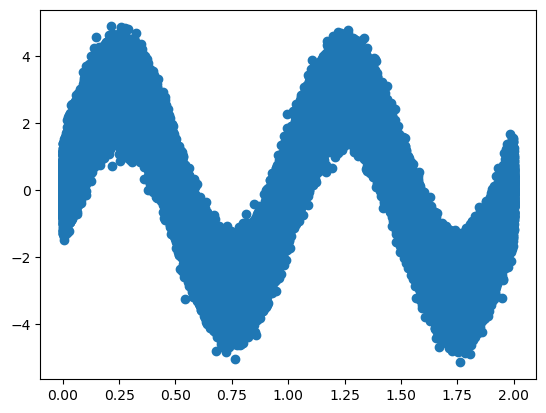

In [69]:
plt.scatter(x_train, y_train);

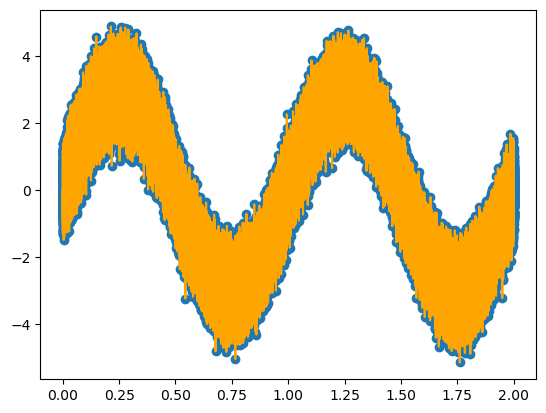

In [70]:
# Model 1
idx = np.argsort(x_train)
mod_1 = y_train.copy()
plt.scatter(x_train, y_train)
plt.plot(x_train[idx], mod_1[idx], color="orange");

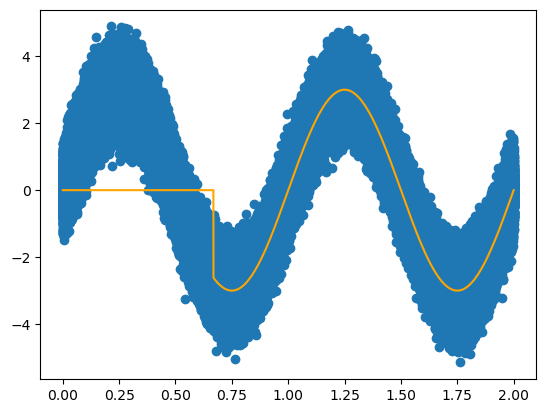

In [71]:
# Model 2
idx = np.argsort(x_train)
mod_2 = truth(x_train)
mod_2[idx[:int(sample_size / 3)]] = 0.
plt.scatter(x_train, y_train)
plt.plot(x_train[idx], mod_2[idx], color="orange");

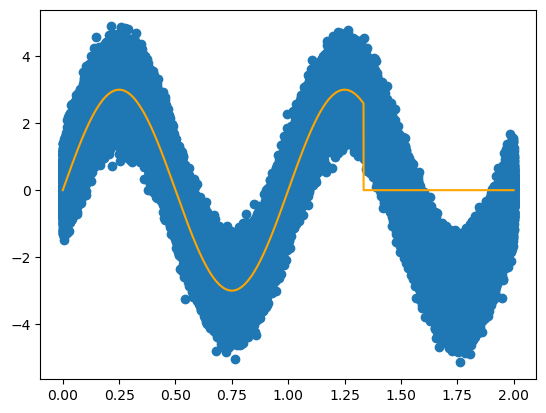

In [72]:
# Model 3
idx = np.argsort(x_train)
mod_3 = truth(x_train)
mod_3[idx[-int(sample_size / 3):]] = 0.
plt.scatter(x_train, y_train)
plt.plot(x_train[idx], mod_3[idx], color="orange");

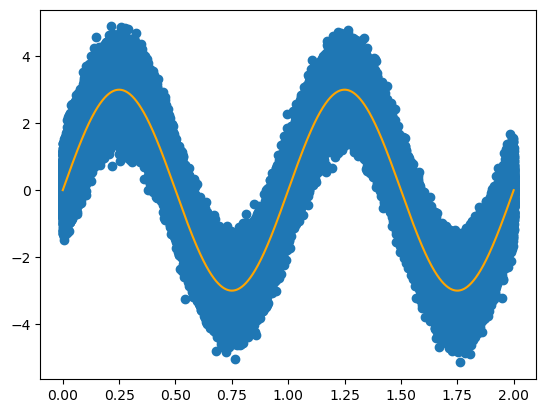

In [73]:
# Model 4
idx = np.argsort(x_train)
mod_4 = truth(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train[idx], mod_4[idx], color="orange");

In [74]:
from model_diagnostics.scoring import decompose, SquaredError

Loss decomposition

In [75]:
models = pd.DataFrame({
    "mod_saturated": mod_1,
    "mod_2": mod_2,
    "mod_3": mod_3,
    "mod_4": mod_4
})

decompose(
    y_train,
    models,
    scoring_function=SquaredError()
)

model,miscalibration,discrimination,uncertainty,score
str,f64,f64,f64,f64
"""mod_saturated""",0.0,4.759109,4.759109,0.0
"""mod_2""",0.360949,3.521987,4.759109,1.598072
"""mod_3""",0.36685,3.525178,4.759109,1.600781
"""mod_4""",0.000392,4.509729,4.759109,0.249773
